<a href="https://colab.research.google.com/github/kbdharun/ML-lab/blob/main/Lab1/ML_Lab1_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Insurance Estimation (Sample) for EDA

Dataset: https://www.kaggle.com/mirichoi0218/insurance

In [24]:
import io
import sys
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
df2=pd.read_csv(r"/content/insurance.csv")

In [4]:
print((df2.shape))

(1338, 7)


In [5]:
print(len(df2.columns))

7


In [6]:
print(df2.head)

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [7]:
print(df2.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [8]:
print('Minimum age: ', df2['age'].min())
print('Maximum age: ', df2['age'].max())

Minimum age:  18
Maximum age:  64


In [9]:
df2 = df2.replace({'sex':{'male':0, 'female':1}, 'smoker':{'yes':0, 'no':1},'region':{'northeast':0,'northwest':1,'southeast':0,'southwest':1}})
print(df2)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       1  21984.47061
4      32    0  28.880         0       1       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       1  10600.54830
1334   18    1  31.920         0       1       0   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       1  29141.36030

[1338 rows x 7 columns]


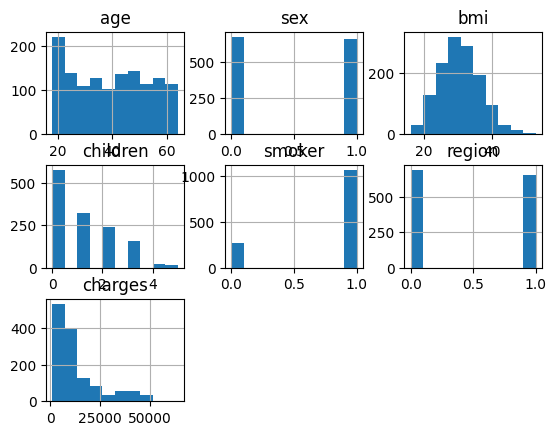

In [10]:
hist=df2.hist()

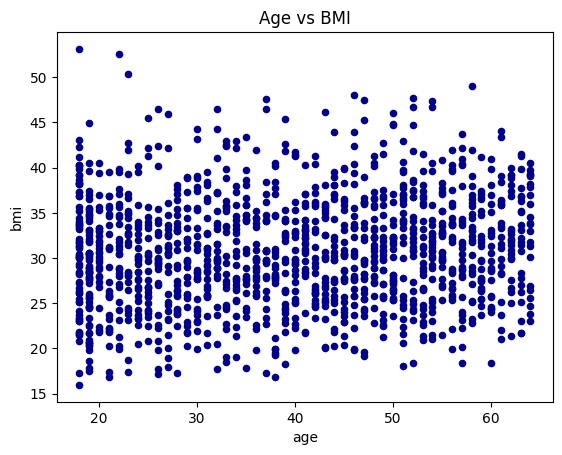

In [11]:
ax1 = df2.plot.scatter(x='age',y='bmi',c='DarkBlue',title='Age vs BMI')

[Text(0.5, 0, 'sex'), Text(0, 0.5, 'BMI')]

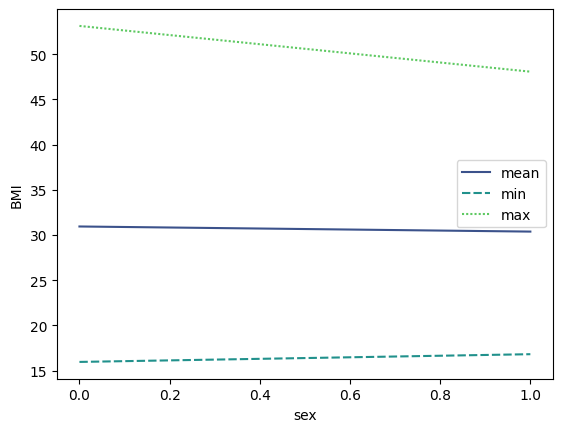

In [12]:
import seaborn as sbn
df = df2.groupby('sex')['bmi'].agg(['mean', 'min', 'max'])
ax = sbn.lineplot(data=df, palette="viridis")
ax.set(xlabel='sex', ylabel='BMI')

[Text(0.5, 0, 'age'), Text(0, 0.5, 'charges')]

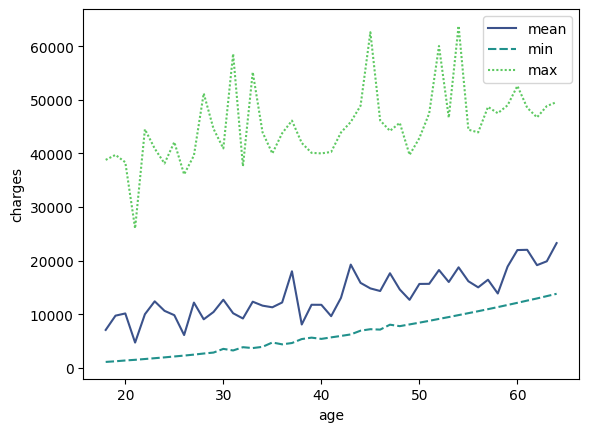

In [13]:
df = df2.groupby('age')['charges'].agg(['mean', 'min', 'max'])
ax = sbn.lineplot(data=df, palette="viridis")
ax.set(xlabel='age', ylabel='charges')

[Text(0.5, 23.52222222222222, 'age'), Text(50.722222222222214, 0.5, 'charges')]

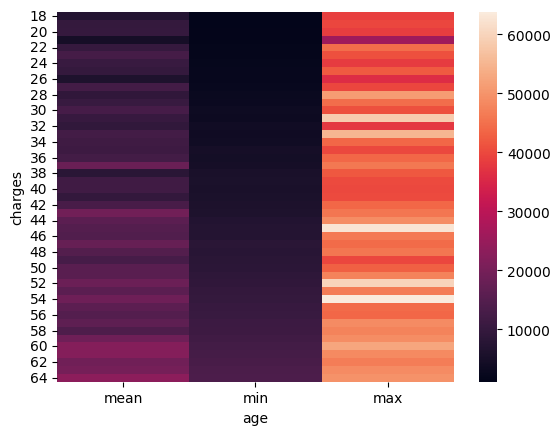

In [19]:
df = df2.groupby('age')['charges'].agg(['mean', 'min', 'max'])
ax = sbn.heatmap(data=df)
ax.set(xlabel='age', ylabel='charges')

[Text(0.5, 23.52222222222222, 'age'), Text(50.722222222222214, 0.5, 'charges')]

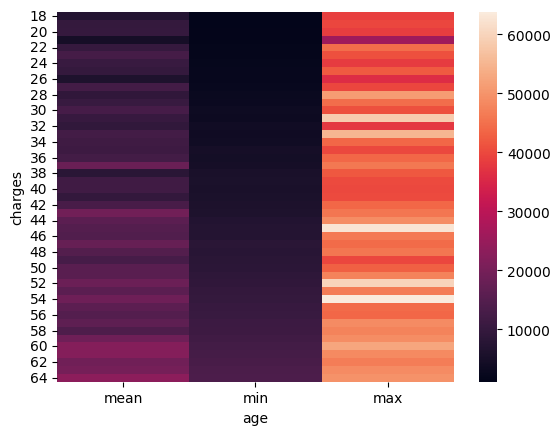

In [28]:
df = df2.groupby('age')['charges'].agg(['mean', 'min', 'max'])
ax = sbn.heatmap(data=df)
ax.set(xlabel='age', ylabel='charges')

[Text(0.5, 0, 'smoker'), Text(0, 0.5, 'charges')]

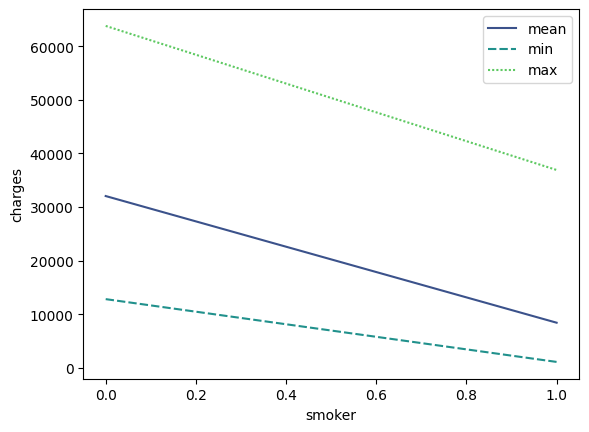

In [14]:
df = df2.groupby('smoker')['charges'].agg(['mean', 'min', 'max'])
ax = sbn.lineplot(data=df, palette="viridis")
ax.set(xlabel='smoker', ylabel='charges')

[Text(0.5, 23.52222222222222, 'smoker'),
 Text(50.722222222222214, 0.5, 'charges')]

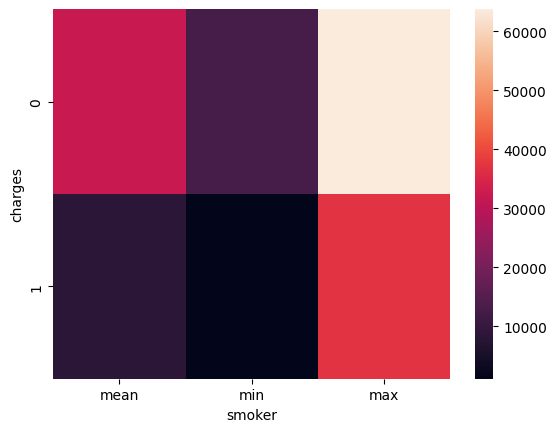

In [20]:
df = df2.groupby('smoker')['charges'].agg(['mean', 'min', 'max'])
ax = sbn.heatmap(data=df)
ax.set(xlabel='smoker', ylabel='charges')

[Text(0.5, 0, 'children'), Text(0, 0.5, 'charges')]

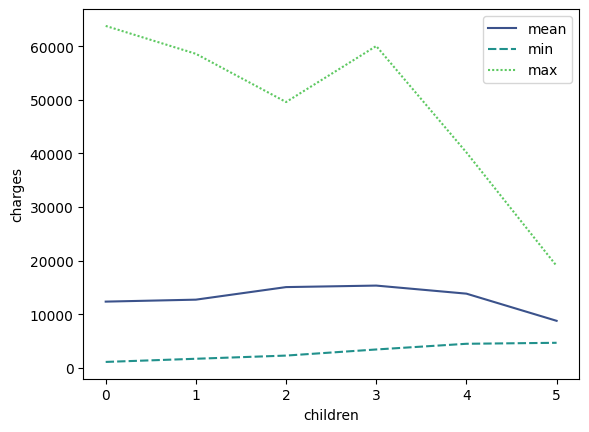

In [15]:
df = df2.groupby('children')['charges'].agg(['mean', 'min', 'max'])
ax = sbn.lineplot(data=df, palette="viridis")
ax.set(xlabel='children', ylabel='charges')

In [16]:
def elder_smoker(row):
  if(row['age']>45 and row['smoker']==0):
    return 1
  else:
    return 0

In [17]:
df2['elder_smoker'] = df2.apply (lambda row: elder_smoker(row), axis=1)
print(df2)

      age  sex     bmi  children  smoker  region      charges  elder_smoker
0      19    1  27.900         0       0       1  16884.92400             0
1      18    0  33.770         1       1       0   1725.55230             0
2      28    0  33.000         3       1       0   4449.46200             0
3      33    0  22.705         0       1       1  21984.47061             0
4      32    0  28.880         0       1       1   3866.85520             0
...   ...  ...     ...       ...     ...     ...          ...           ...
1333   50    0  30.970         3       1       1  10600.54830             0
1334   18    1  31.920         0       1       0   2205.98080             0
1335   18    1  36.850         0       1       0   1629.83350             0
1336   21    1  25.800         0       1       1   2007.94500             0
1337   61    1  29.070         0       0       1  29141.36030             1

[1338 rows x 8 columns]
